In [1]:
## Set-up Environment
import os
import sys

# Setup: Get notebook directory and set project root
notebook_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(notebook_dir, ".."))
os.chdir(project_root)

# Add project root to Python path for absolute imports like 'env.trading_env'
if project_root not in sys.path:
    sys.path.append(project_root)

# Print confirmation
print("📂 Notebook directory:", notebook_dir)
print("✅ Project root set to:", project_root)

# Change directory to project folder (optional)
%cd /workspaces/Strategy_PPO_Bots


📂 Notebook directory: /workspaces/Strategy_PPO_Bots
✅ Project root set to: /workspaces
/workspaces/Strategy_PPO_Bots


In [2]:
## Check to ensure in the right directory
! pwd

/workspaces/Strategy_PPO_Bots


In [3]:
## Install dependencies
! pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable


In [4]:
## Run integration test script
#! pytest tests/integration/test_integration.py --maxfail=1 --disable-warnings -q

In [6]:
## Generate Training Data
! python data_gen/generate_data.py

Saved CSV: data/AAPL_5minute.csv
Saved Parquet: data/AAPL_5minute.parquet
Saved CSV: data/AAPL_1day.csv
Saved Parquet: data/AAPL_1day.parquet
Saved CSV: data/AAPL_1week.csv
Saved Parquet: data/AAPL_1week.parquet


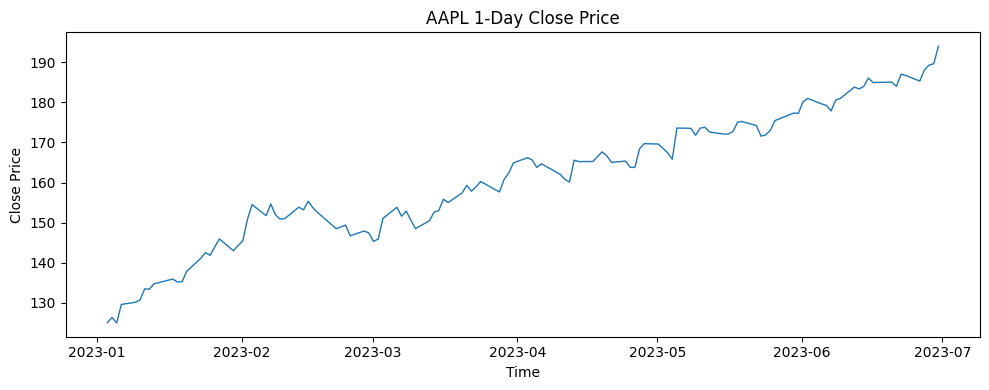

In [7]:
## ─── Plot all 1day CSVs in data/ ─────────────────────────────────────────
import glob

import matplotlib.pyplot as plt
import pandas as pd

# 1. Grab every CSV matching *_1day.csv
csv_files = glob.glob("data/*_1day.csv")
if not csv_files:
    raise FileNotFoundError("No files found: data/*_1day.csv")

# 2. Loop and plot
for file_path in sorted(csv_files):
    # Load and parse time
    df = pd.read_csv(file_path, parse_dates=[0])
    df.set_index(df.columns[0], inplace=True)

    # Extract ticker from filename
    ticker = file_path.split("/")[-1].split("_")[0]

    # Create the figure
    plt.figure(figsize=(10, 4))
    plt.plot(df.index, df["close"], linewidth=1)
    plt.title(f"{ticker} 1-Day Close Price")
    plt.xlabel("Time")
    plt.ylabel("Close Price")
    plt.tight_layout()
    plt.show()

In [7]:
## Run Integration Test for PPO
# %run train/train_ppo.py --test


In [8]:
import torch

print("CUDA Available:", torch.cuda.is_available())
print("Device:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU")


CUDA Available: False
Device: CPU


In [9]:
# Run PPO training using files in `data/` directory
%run train/train_ppo.py

[Seed] Using seed: 42
[Train] Using AAPL_5minute.csv for AAPL

=== DEBUG: Data Summary ===
[Shape] Rows: 11949 Columns: 6
[Columns] ['timestamp', 'open', 'high', 'low', 'close', 'volume']

[NaN counts per column]
timestamp    0
open         0
high         0
low          0
close        0
volume       0
dtype: int64

[First 30 rows]
              timestamp    open    high     low   close   volume
0   2023-01-03 09:00:00  130.28  131.46  130.28  131.46  28978.0
1   2023-01-03 09:05:00  131.36  131.44  131.00  131.13  30130.0
2   2023-01-03 09:10:00  131.19  131.35  131.19  131.22   7838.0
3   2023-01-03 09:15:00  131.21  131.32  131.09  131.10  14795.0
4   2023-01-03 09:20:00  131.01  131.13  130.95  131.13  19138.0
5   2023-01-03 09:25:00  131.14  131.14  130.90  130.90   4796.0
6   2023-01-03 09:30:00  130.92  130.97  130.90  130.94   6731.0
7   2023-01-03 09:40:00  131.02  131.24  131.02  131.15  11158.0
8   2023-01-03 09:45:00  131.22  131.30  131.17  131.30  10712.0
9   2023-01-03 09

/usr/local/lib/python3.11/site-packages/pydantic/_internal/_config.py:323: PydanticDeprecatedSince20: Support for class-based `config` is deprecated, use ConfigDict instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  warnings.warn(DEPRECATION_MESSAGE, DeprecationWarning)
/workspaces/Strategy_PPO_Bots/env/feature_engineering.py:96: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = df[name].fillna(method="ffill").fillna(0)
/workspaces/Strategy_PPO_Bots/env/feature_engineering.py:96: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = df[name].fillna(method="ffill").fillna(0)
/workspaces/Strategy_PPO_Bots/env/feature_engineering.py:96: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future 

ValueError: Unsupported indicator: rsi

In [ ]:
! ls ../debug_rewards.log
